### Import Library

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Uplaod Dataset

In [16]:
df = pd.read_csv('ICC Mens T20 Worldcup.csv')
print(f"Dataset: {df.shape[0]} matches, {df.shape[1]} columns")

Dataset: 55 matches, 32 columns


In [17]:
df.head()

,Match No.,Date of Match,Venue Stadium,Venue City,1st Team,2nd Team,Stage,Umpire 1,Umpire 2,Reserve Umpire,...,Method,Won by,Winning Margin,Top Run Scorer,Highest Score,Best Bowler,Best Bowler Figure(Wickets Taken),Best Bowler Figure(Runs Recieved),Player Of The Match,Super Over Match
0,1st,02-06-2024,Grand Prairie Stadium,Dallas,Canada,United State Of America,Group A,Richard Illingworth,Sharfuddoula,Langton Rusere,...,Normal Match,Wickets,7,Aaron Jones,94,Dilon Heyliger,1,19,Aaron Jones,No
1,2nd,02-06-2024,Providence Stadium,Providence,Papua New Guinea,West Indies,Group C,Adrian Holdstock,Rashid Riaz,Kumar Dharmasena,...,Normal Match,Wickets,5,Sese Bau,50,Andre Russell,2,19,Roston Chase,No
2,3rd,03-06-2024,Kensington Oval,Bridgetown,Oman,Namibia,Group B,Jayaraman Madanagopal,Joel Wilson,Asif Yaqoob,...,Normal Match,Wickets,4,Jan Frylinck,45,Mehran Khan,3,7,David Wiese,Yes
3,4th,03-06-2024,Nassau County International Cricket Stadium,New York,Sri Lanka,South Africa,Group D,Chris Brown,Richard Kettleborough,Alex Wharf,...,Normal Match,Wickets,6,Quinton de Kock,20,Anrich Nortje,4,7,Anrich Nortje,No
4,5th,04-06-2024,Providence Stadium,Providence,Afghanistan,Uganda,Group C,Ahsan Raza,Kumar Dharmasena,Rashid Riaz,...,Normal Match,Runs,125,Rahmanullah Gurbaz,76,Fazalhaq Farooqi,5,9,Fazalhaq Farooqi,No


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Match No.                          55 non-null     object
 1   Date of Match                      55 non-null     object
 2   Venue Stadium                      55 non-null     object
 3   Venue City                         55 non-null     object
 4   1st Team                           55 non-null     object
 5   2nd Team                           55 non-null     object
 6   Stage                              55 non-null     object
 7   Umpire 1                           55 non-null     object
 8   Umpire 2                           55 non-null     object
 9   Reserve Umpire                     55 non-null     object
 10  Match Referee                      55 non-null     object
 11  TV Umpire                          55 non-null     object
 12  Toss Winni

In [21]:
completed_matches = df[df['Match Result'] != 'Abandoned']
print(f"Total Matches: {len(df)}")
print(f"Completed Matches: {len(completed_matches)}")
print(f"Abandoned Matches: {len(df) - len(completed_matches)}")
print(f"Tournament Duration: {df['Date of Match'].min()} to {df['Date of Match'].max()}")
print(f"Number of Venues: {df['Venue Stadium'].nunique()}")
print(f"Number of Teams: {pd.concat([df['1st Team'], df['2nd Team']]).nunique()}")
print(f"Stages: {', '.join(df['Stage'].unique())}")

Total Matches: 55
Completed Matches: 51
Abandoned Matches: 4
Tournament Duration: 02-06-2024 to 29-06-2024
Number of Venues: 9
Number of Teams: 20
Stages: Group A, Group C, Group B, Group D, Group 2, Group 1, 1st Semi-Final, 2nd Semi-Final, Final


### Venue Details

In [22]:
venue_stats = completed_matches.groupby('Venue Stadium').agg({
    'Match No.': 'count',
    'First Innings Score': 'mean',
    'Second Innings Score': 'mean'
}).round(2)

print(venue_stats)

                                                   Match No.  \
Venue Stadium                                                  
Arnos Vale Ground                                          5   
Brian Lara Stadium                                         5   
Central Broward Regional Park Stadium Turf Ground          1   
Daren Sammy National Cricket Stadium                       6   
Grand Prairie Stadium                                      4   
Kensington Oval                                            8   
Nassau County International Cricket Stadium                8   
Providence Stadium                                         6   
Sir Vivian Richards Stadium                                8   

                                                   First Innings Score  \
Venue Stadium                                                            
Arnos Vale Ground                                               128.60   
Brian Lara Stadium                                               83.60   

### Toss Impact Analysis

In [23]:
toss_impact = len(completed_matches[completed_matches['Toss Winning'] == completed_matches['Winners']])
toss_win_percentage = (toss_impact / len(completed_matches) * 100)


print("🎯 TOSS ANALYSIS")
print(f"Matches won by toss winner: {toss_win_percentage:.1f}%")
print(f"Toss decisions: {completed_matches['Toss Decision'].value_counts().to_dict()}")

🎯 TOSS ANALYSIS
Matches won by toss winner: 54.9%
Toss decisions: {'Fielding': 42, 'Batting': 9}


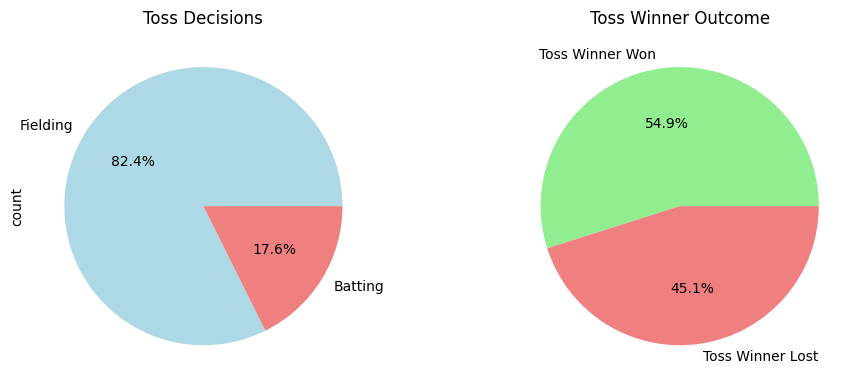

In [24]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
completed_matches['Toss Decision'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Toss Decisions')


plt.subplot(1, 2, 2)
labels = ['Toss Winner Won', 'Toss Winner Lost']
sizes = [toss_win_percentage, 100 - toss_win_percentage]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Toss Winner Outcome')

plt.tight_layout()
plt.show()

### Team Performance

In [25]:
team_stats = pd.DataFrame({
    'Matches': completed_matches['1st Team'].value_counts() + completed_matches['2nd Team'].value_counts(),
    'Wins': completed_matches['Winners'].value_counts()
})
team_stats['Win_Rate'] = (team_stats['Wins'] / team_stats['Matches'] * 100).round(1)
team_stats = team_stats.sort_values('Win_Rate', ascending=False)

print("🏏 TEAM PERFORMANCE")
print(team_stats)

🏏 TEAM PERFORMANCE
                         Matches  Wins  Win_Rate
India                        8.0   8.0     100.0
South Africa                 9.0   8.0      88.9
Australia                    7.0   5.0      71.4
West Indies                  7.0   5.0      71.4
Scotland                     3.0   2.0      66.7
Afghanistan                  8.0   5.0      62.5
England                      7.0   4.0      57.1
Pakistan                     4.0   2.0      50.0
Bangladesh                   7.0   3.0      42.9
United State Of America      6.0   2.0      33.3
Namibia                      4.0   1.0      25.0
Netherlands                  4.0   1.0      25.0
Uganda                       4.0   1.0      25.0
Canada                       NaN   1.0       NaN
Ireland                      3.0   NaN       NaN
Nepal                        3.0   NaN       NaN
New Zealand                  NaN   2.0       NaN
Oman                         4.0   NaN       NaN
Papua New Guinea             NaN   NaN       NaN
S

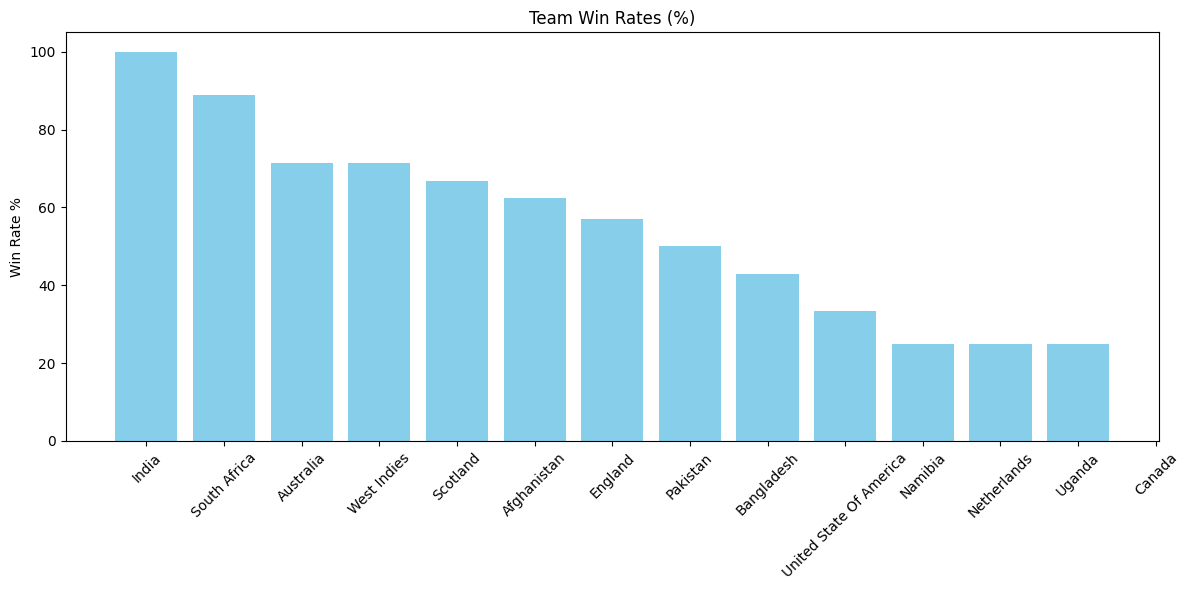

In [26]:
plt.figure(figsize=(12, 6))
plt.bar(team_stats.index, team_stats['Win_Rate'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Team Win Rates (%)')
plt.ylabel('Win Rate %')
plt.tight_layout()
plt.show()

### Match Results Analysis

In [27]:
print("📊 MATCH RESULTS")
print(f"Win methods: {completed_matches['Won by'].value_counts().to_dict()}")

close_matches = completed_matches[
    ((completed_matches['Won by'] == 'Runs') & (completed_matches['Winning Margin'] <= 10)) |
    ((completed_matches['Won by'] == 'Wickets') & (completed_matches['Winning Margin'] <= 3))
]
print(f"Close matches (≤10 runs or ≤3 wickets): {len(close_matches)}")

📊 MATCH RESULTS
Win methods: {'Runs': 26, 'Wickets': 25}
Close matches (≤10 runs or ≤3 wickets): 11


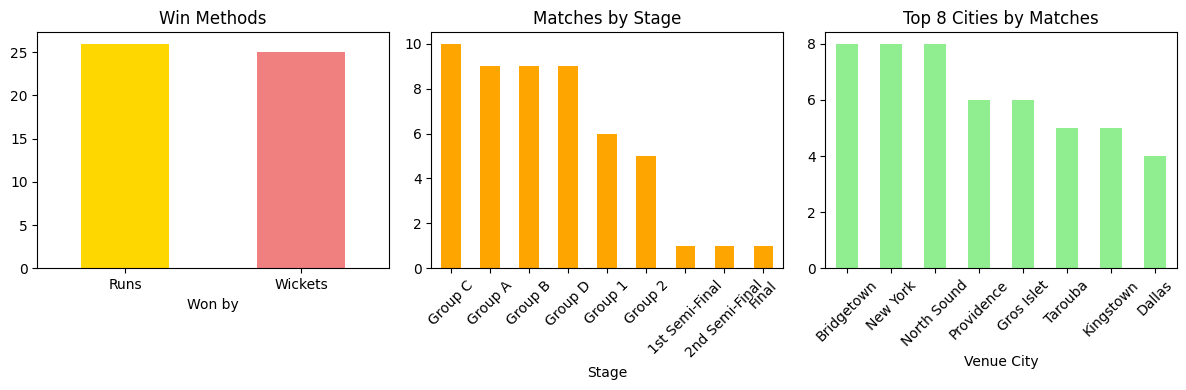

In [28]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
completed_matches['Won by'].value_counts().plot.bar(color=['gold', 'lightcoral', 'lightblue'])
plt.title('Win Methods')
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
completed_matches['Stage'].value_counts().plot.bar(color='orange')
plt.title('Matches by Stage')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
venue_counts = completed_matches['Venue City'].value_counts().head(8)
venue_counts.plot.bar(color='lightgreen')
plt.title('Top 8 Cities by Matches')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [29]:
# High scoring matches
high_scoring_matches = completed_matches.nlargest(5, 'First Innings Score')[['1st Team', '2nd Team', 'First Innings Score', 'Second Innings Score', 'Winners']]
print("Highest Scoring Matches:")
print(high_scoring_matches)

# Low scoring matches
low_scoring_matches = completed_matches.nsmallest(5, 'First Innings Score')[['1st Team', '2nd Team', 'First Innings Score', 'Second Innings Score', 'Winners']]
print("\nLowest Scoring Matches:")
print(low_scoring_matches)

Highest Scoring Matches:
       1st Team     2nd Team  First Innings Score  Second Innings Score  \
39  West Indies  Afghanistan                  218                   114   
50        India    Australia                  205                   181   
16    Australia      England                  201                   165   
37    Sri Lanka  Netherlands                  201                   118   
46        India   Bangladesh                  196                   146   

        Winners  
39  West Indies  
50        India  
16    Australia  
37    Sri Lanka  
46        India  

Lowest Scoring Matches:
       1st Team      2nd Team  First Innings Score  Second Innings Score  \
31       Uganda   New Zealand                   40                    41   
27         Oman       England                   47                    50   
52  Afghanistan  South Africa                   56                    60   
23      Namibia     Australia                   72                    74   
3     Sri L

### Player Performance Analysis

In [30]:
top_scorers = completed_matches.groupby('Top Run Scorer')['Highest Score'].agg(['count', 'max', 'mean']).round(2)
top_scorers = top_scorers.rename(columns={'count': 'Times_Top_Scorer', 'max': 'Highest_Score', 'mean': 'Average_Score'})
top_scorers = top_scorers.sort_values('Times_Top_Scorer', ascending=False)

print("Top Run Scorers:")
print(top_scorers.head(5))

top_bowlers = completed_matches.groupby('Best Bowler')['Best Bowler Figure(Wickets Taken)'].agg(['count', 'max', 'mean']).round(2)
top_bowlers = top_bowlers.rename(columns={'count': 'Times_Top_Bowler', 'max': 'Best_Figures_Wickets', 'mean': 'Average_Wickets'})
top_bowlers = top_bowlers.sort_values('Times_Top_Bowler', ascending=False)

print("\nTop Bowlers:")
print(top_bowlers.head(5))

player_of_match = completed_matches['Player Of The Match'].value_counts()
print("\nPlayer of the Match Awards:")
print(player_of_match.head(5))

Top Run Scorers:
                    Times_Top_Scorer  Highest_Score  Average_Score
Top Run Scorer                                                    
Jos Buttler                        3             83          49.67
Rohit Sharma                       3             92          67.00
Quinton de Kock                    3             74          53.00
Rahmanullah Gurbaz                 3             80          72.00
Reeza Hendricks                    2             43          36.00

Top Bowlers:
                Times_Top_Bowler  Best_Figures_Wickets  Average_Wickets
Best Bowler                                                            
Adil Rashid                    3                     4             2.33
Rashid Khan                    3                     4             3.67
Adam Zampa                     2                     4             3.00
Tabraiz Shamsi                 2                     4             3.50
Jasprit Bumrah                 2                     3             2

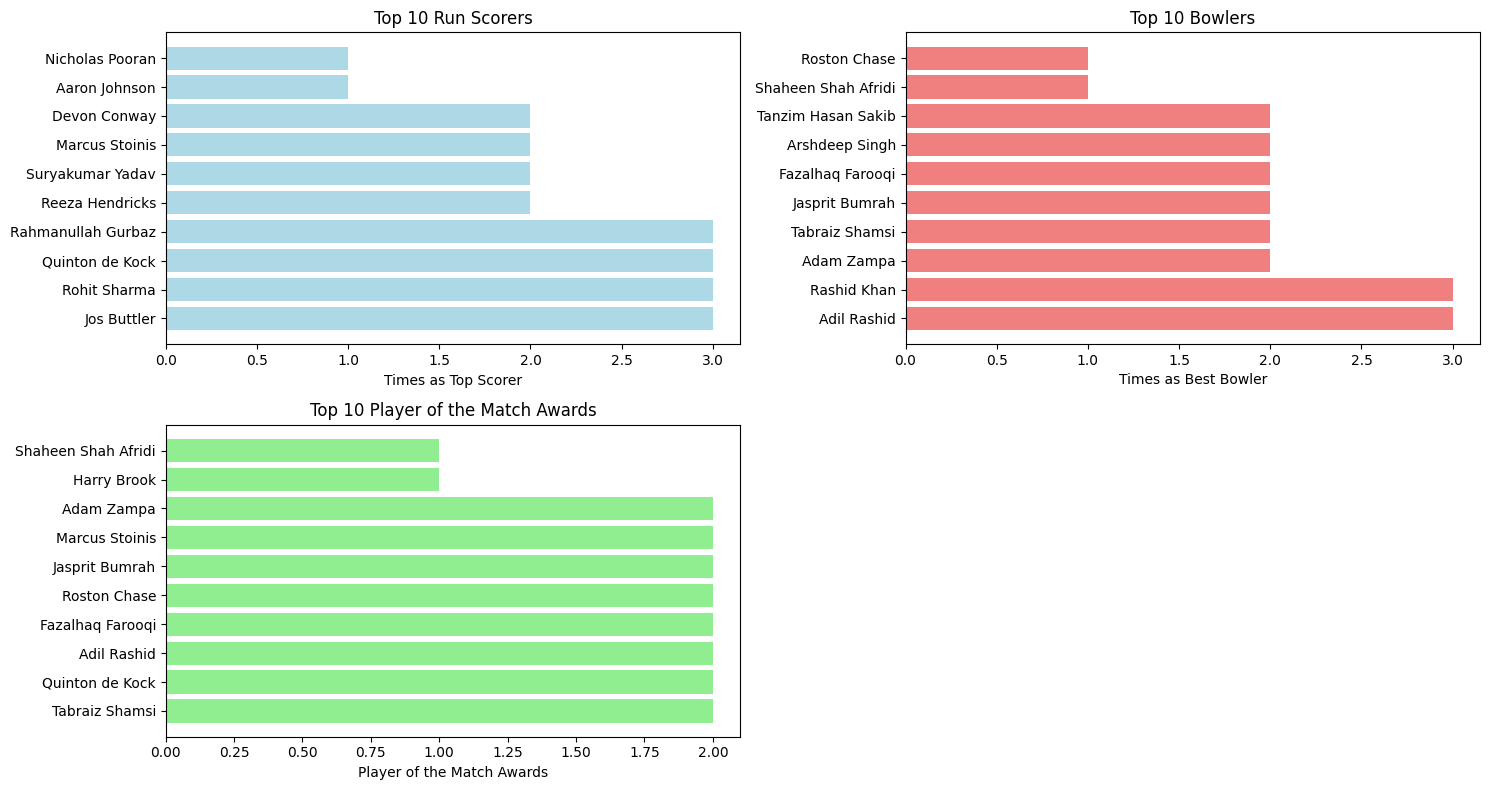

In [31]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
top_10_scorers = top_scorers.head(10)
plt.barh(range(len(top_10_scorers)), top_10_scorers['Times_Top_Scorer'], color='lightblue')
plt.yticks(range(len(top_10_scorers)), top_10_scorers.index)
plt.xlabel('Times as Top Scorer')
plt.title('Top 10 Run Scorers')

plt.subplot(2, 2, 2)
top_10_bowlers = top_bowlers.head(10)
plt.barh(range(len(top_10_bowlers)), top_10_bowlers['Times_Top_Bowler'], color='lightcoral')
plt.yticks(range(len(top_10_bowlers)), top_10_bowlers.index)
plt.xlabel('Times as Best Bowler')
plt.title('Top 10 Bowlers')

plt.subplot(2, 2, 3)
top_10_pom = player_of_match.head(10)
plt.barh(range(len(top_10_pom)), top_10_pom.values, color='lightgreen')
plt.yticks(range(len(top_10_pom)), top_10_pom.index)
plt.xlabel('Player of the Match Awards')
plt.title('Top 10 Player of the Match Awards')

plt.tight_layout()  
plt.show()


### Key Insights Summary

In [32]:
print("📈 KEY INSIGHTS SUMMARY")

# Basic stats
total_matches = len(df)
completed = len(completed_matches)
abandoned = total_matches - completed

print(f"Total matches: {total_matches}")
print(f"Completed: {completed} ({completed/total_matches*100:.1f}%)")
print(f"Abandoned: {abandoned} ({abandoned/total_matches*100:.1f}%)")
print(f"Tournament Duration: {df['Date of Match'].min()} to {df['Date of Match'].max()}")
print(f"Teams participated: {pd.concat([df['1st Team'], df['2nd Team']]).nunique()}")
print(f"Number of Venues: {df['Venue Stadium'].nunique()}")

# Final match result - Champion and Runner-up
final_match = df[df['Stage'] == 'Final'].iloc[0]
champion = final_match['Winners']
runner_up = final_match['Losers']
champion_score = final_match['First Innings Score']
runner_up_score = final_match['Second Innings Score']
winning_margin = final_match['Winning Margin']
won_by = final_match['Won by']

print(f"\n🏆 T20 WORLD CUP 2024 FINAL:")
print(f"Champions: {champion}")
print(f"Runner-up: {runner_up}")
print(f"Final Score: {champion} {champion_score}/{final_match['Fall of wickets First Innings']} vs {runner_up} {runner_up_score}/{final_match['Fall of wickets Second Innings']}")
print(f"Winning Margin: {winning_margin} {won_by}")

# Most successful team (by win rate)
best_team = team_stats.index[0]
best_win_rate = team_stats['Win_Rate'].iloc[0]
print(f"\n⭐ Most Successful Team (by win rate): {best_team} ({best_win_rate}% win rate)")

📈 KEY INSIGHTS SUMMARY
Total matches: 55
Completed: 51 (92.7%)
Abandoned: 4 (7.3%)
Tournament Duration: 02-06-2024 to 29-06-2024
Teams participated: 20
Number of Venues: 9

🏆 T20 WORLD CUP 2024 FINAL:
Champions: India
Runner-up: South Africa
Final Score: India 176/7 vs South Africa 169/8
Winning Margin: 7 Runs

⭐ Most Successful Team (by win rate): India (100.0% win rate)
